In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

# Versuch 4: Reihenschwingkreis

### Aufgabe 1
    Visualisieren der Daten

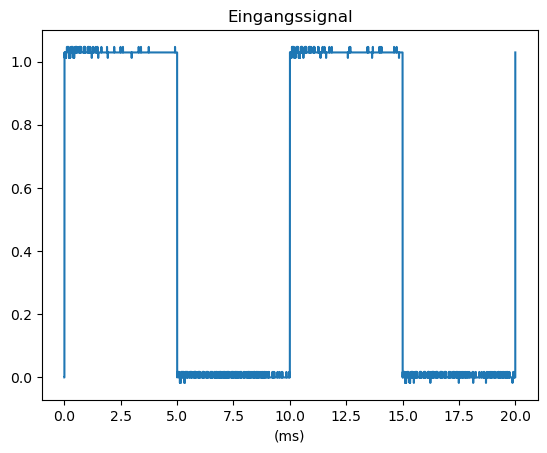

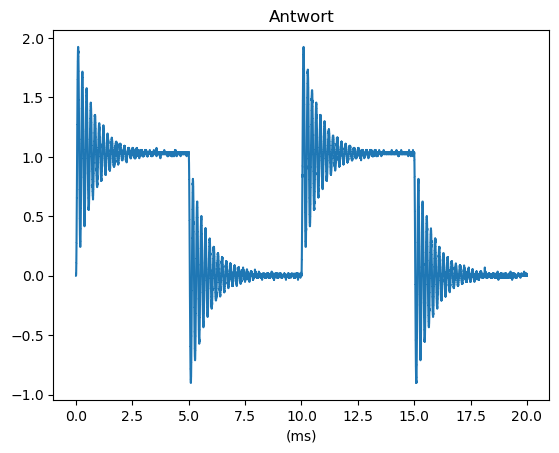

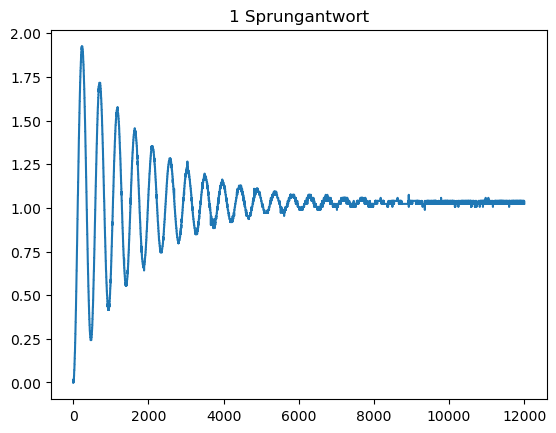

In [41]:
absPath = "C:/Users/tombo/HTWG/AIN/3/technische-grundlagen-der-kuenstlichen-intelligenz/versuch4"
schwingkreis = pd.read_csv(f"{absPath}/reihenschwingkreis.csv", sep=';', decimal=',', header=1)
ms = schwingkreis["(ms)"] + 10
plt.plot(ms, schwingkreis["(V)"])
plt.title("Eingangssignal")
plt.xlabel("(ms)")
plt.show()
plt.plot(ms, schwingkreis["(V).1"])
plt.title("Antwort")
plt.xlabel("(ms)")
plt.show()

sprung = schwingkreis["(V)"][:12000]
sprungResponse = schwingkreis["(V).1"][:12000]
plt.plot(sprungResponse)
plt.title("1 Sprungantwort")
plt.show()

#### Glätten

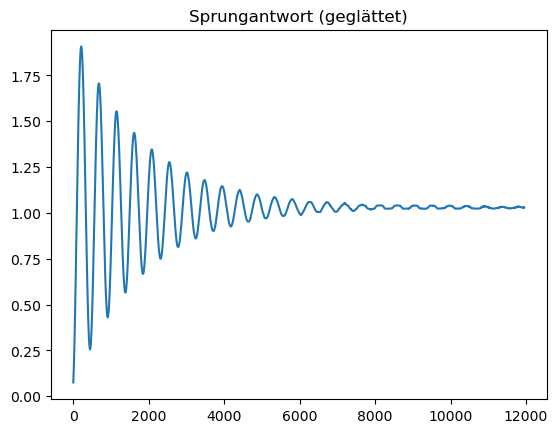

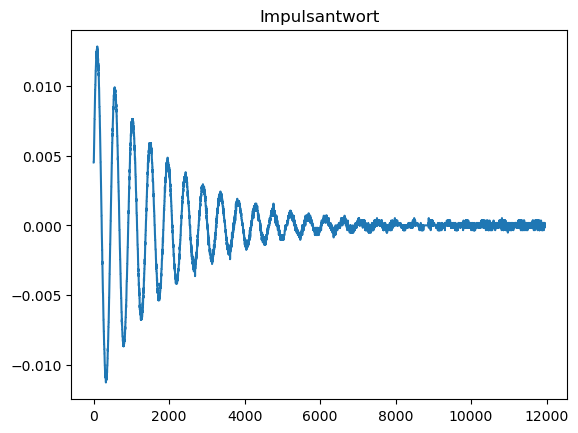

In [42]:
windowSize = 50
filter_ = np.ones(windowSize) / windowSize
cleanResp = np.convolve(sprungResponse, filter_, mode='valid')
plt.plot(cleanResp)
plt.title("Sprungantwort (geglättet)")
plt.show()
ablResp = np.gradient(cleanResp)
plt.plot(ablResp)
plt.title("Impulsantwort")
plt.show()

FFT

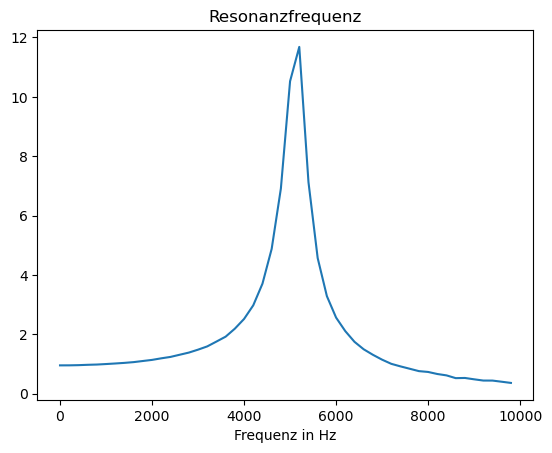

Resonanzfrequenz: 5200.0Hz +- 200 Hz
selbst berechnete Resonanzfrequenz: 5033 Hz


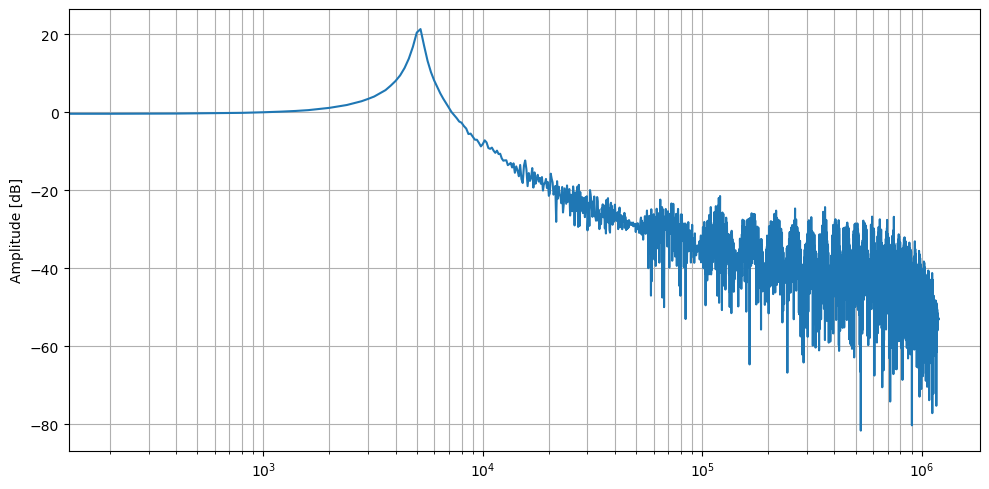

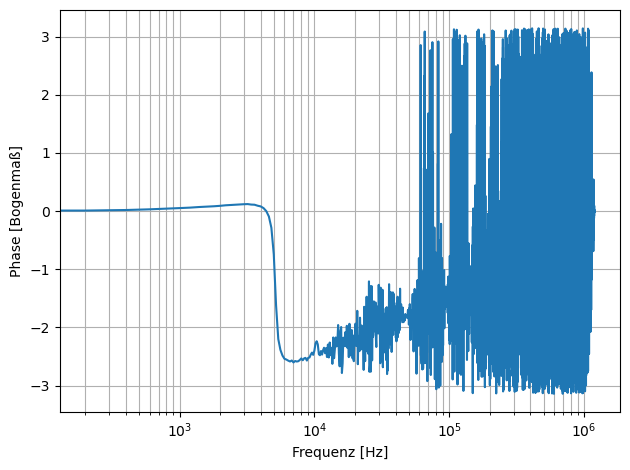

In [43]:
fs = ablResp.size / 0.005
fft = np.fft.rfft(ablResp)
freqs = np.fft.rfftfreq(ablResp.size, d=1/fs)
absFft = np.abs(fft)[:len(freqs)]


ausschnitt = 50
db = 20 * np.log10(absFft)
deg = np.angle(fft)[:len(freqs)]

plt.plot(freqs[: ausschnitt],absFft[: ausschnitt])
plt.title("Resonanzfrequenz")
plt.xlabel("Frequenz in Hz")
plt.show()
print(f"Resonanzfrequenz: {freqs[np.argmax(absFft[: ausschnitt])]}Hz +- {int(freqs[1])} Hz")
print(f"selbst berechnete Resonanzfrequenz: 5033 Hz")

plt.figure(figsize=(10, 5))
plt.semilogx(freqs, db)
plt.ylabel('Amplitude [dB]')
plt.grid(True, which="both")
plt.tight_layout()
plt.show()

plt.semilogx(freqs, deg)
plt.ylabel('Phase [Bogenmaß]')
plt.xlabel('Frequenz [Hz]')
plt.grid(True, which="both")
plt.tight_layout()
plt.show()

## Aufgabe 2: Never Gonna Give You Up

#### Visualisieren von den Song-Daten

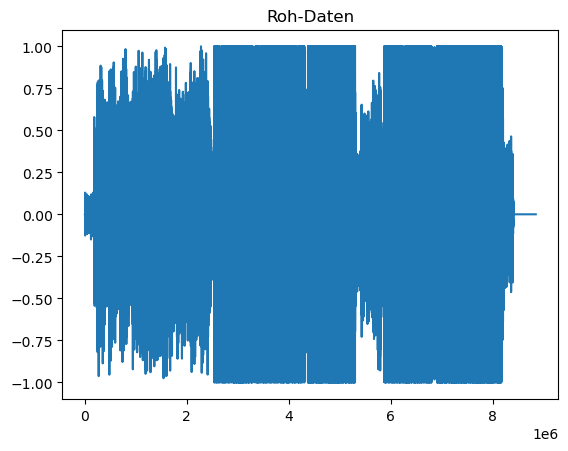

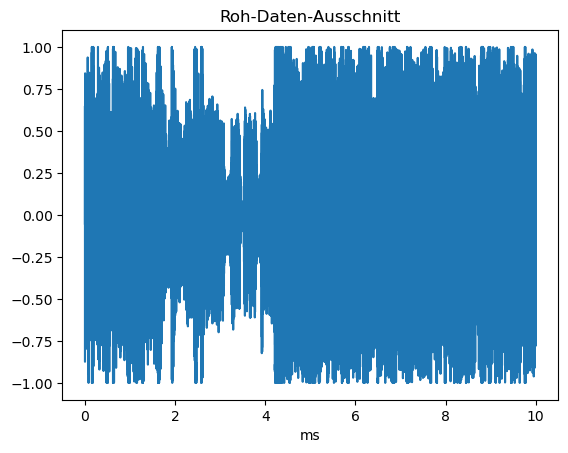

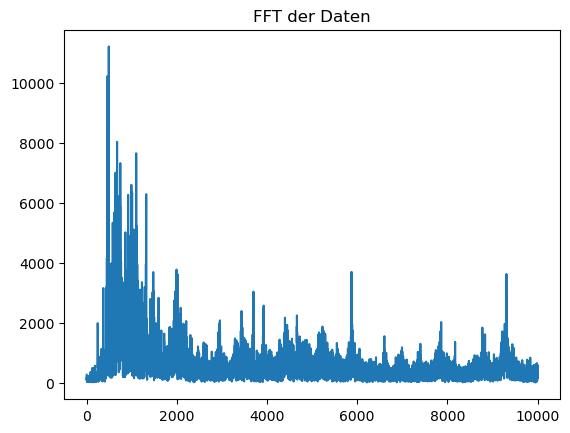

Frequenz der Daten: 49.1 Hz
Länge: 200.53s


In [44]:
astley, fs = lr.load(f"{absPath}/emptiness_machine.wav", sr=None)
tickTime = 1 / fs
plt.plot(astley)
plt.title("Roh-Daten")
plt.show()
start = 95 * fs
tenMs = astley[start : start + (10 * fs)]
time = np.arange(tenMs.size)/fs
plt.plot(time, tenMs)
plt.title("Roh-Daten-Ausschnitt")
plt.xlabel("ms")
plt.show()
fft = np.abs(np.fft.fft(tenMs))
plt.plot(fft[0:10000])
plt.title("FFT der Daten")
plt.show()
print(f"Frequenz der Daten: {np.argmax(np.abs(fft[:5*fs])) * fs / fft.size} Hz")
print(f"Länge: {astley.size / fs:0.2f}s")

In [45]:
blockLen = 1024

blockAnz = tenMs.size // blockLen
blocks_ = np.zeros((blockAnz, blockLen))
blockF = np.arange(blockLen) // tickTime
frq = np.zeros(blockAnz)
for i in range(blockAnz):
    blocks_[i] = tenMs[i * blockLen : (i + 1) * blockLen]

Grenzen: 9, 46


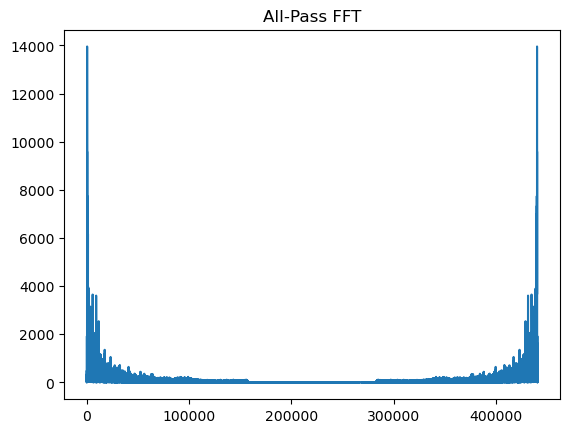

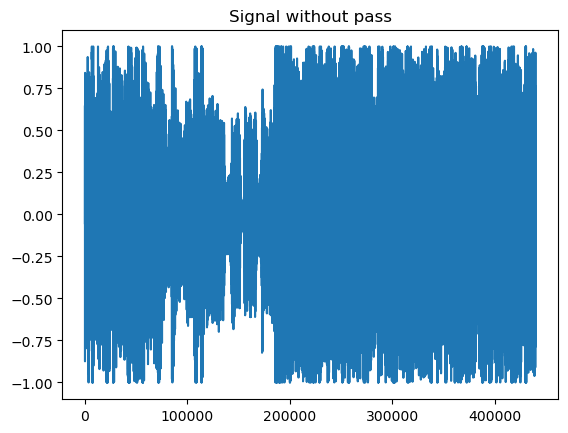

In [46]:
hochpass = np.zeros(blockLen)
tiefpass = np.zeros(blockLen)
bandpass = np.zeros(blockLen)
grenzA = int(400 * blockLen * tickTime)
grenzB = int(2000 * blockLen * tickTime)
print(f"Grenzen: {grenzA}, {grenzB}")
for i in range(0, grenzA):
    tiefpass[i] = 1
for i in range(blockLen - grenzA, blockLen):
    tiefpass[i] = 1
for i in range(grenzB, blockLen - grenzB):
    hochpass[i] = 1
for i in range(grenzA, grenzB):
    bandpass[i] = 1
for i in range(blockLen - grenzB, blockLen - grenzA):
    bandpass[i] = 1

def passArr(passArr):
    data = np.zeros((blockAnz, blockLen))
    for i in range(0, blockAnz):
        blockFreq = np.fft.fft(blocks_[i]) * passArr
        data[i] = np.fft.ifft(blockFreq).real
    return data.flatten()
hoch = passArr(hochpass)
tief = passArr(tiefpass)
band = passArr(bandpass)

noPass = passArr(np.ones(blockLen))
plt.plot(np.abs(np.fft.fft(noPass)))
plt.title("All-Pass FFT")
plt.show()
plt.plot(noPass)
plt.title("Signal without pass")
plt.show()
Audio(noPass, rate=fs)

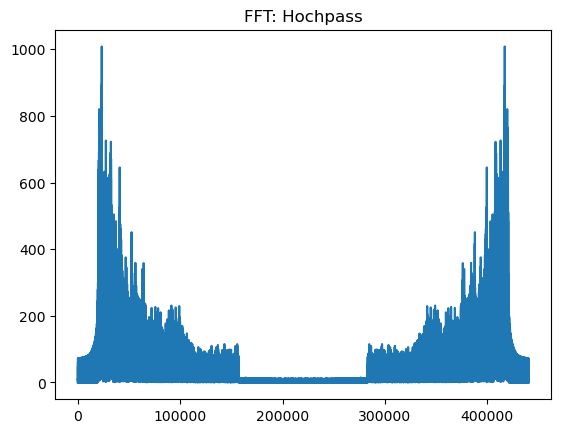

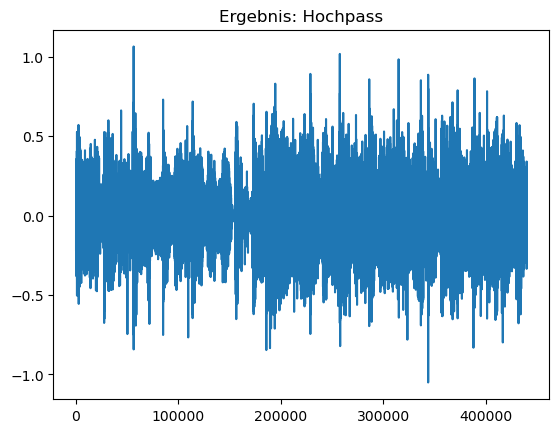

In [47]:
plt.plot(np.abs(np.fft.fft(hoch)))
plt.title("FFT: Hochpass")
plt.show()
plt.plot(hoch)
plt.title("Ergebnis: Hochpass")
plt.show()
Audio(hoch, rate=fs)

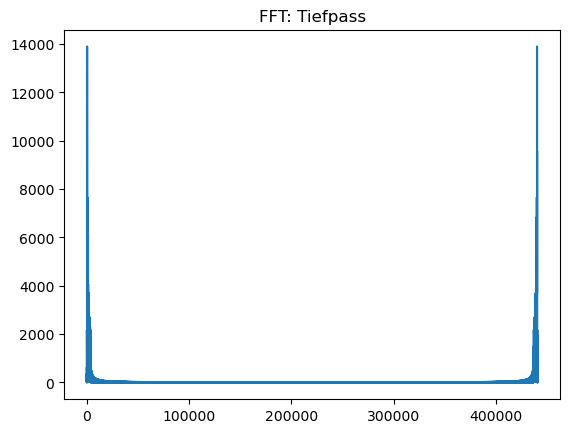

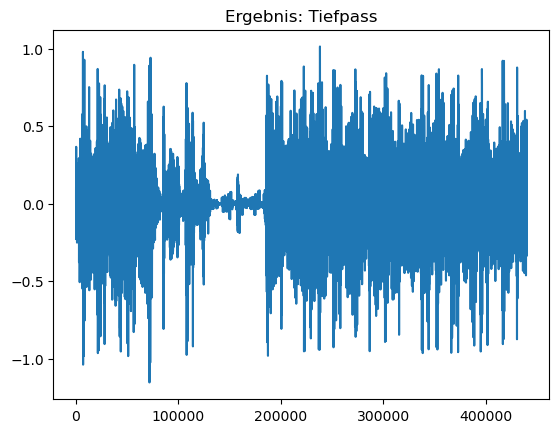

In [48]:
plt.plot(np.abs(np.fft.fft(tief)))
plt.title("FFT: Tiefpass")
plt.show()
plt.plot(tief)
plt.title("Ergebnis: Tiefpass")
plt.show()
Audio(tief, rate=fs)

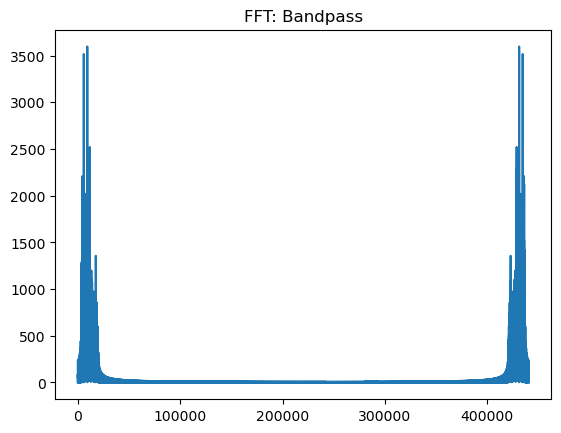

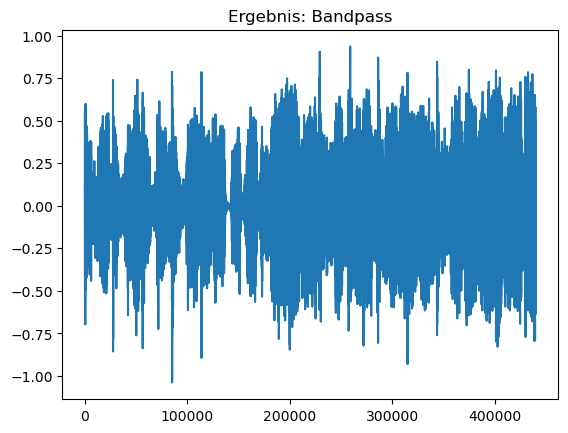

In [49]:
plt.plot(np.abs(np.fft.fft(band)))
plt.title("FFT: Bandpass")
plt.show()
plt.plot(band)
plt.title("Ergebnis: Bandpass")
plt.show()
Audio(band, rate=fs)